In [8]:
library(Seurat)
library(tidyverse)

In [9]:
typeof(xe$matrix)

ERROR: Error in typeof(xe$matrix): object 'xe' not found


In [10]:
data.dir = '/data/petar/xenium/xenium_subset/'

In [11]:
xe = ReadXenium(data.dir)

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [13]:
xe

   [[ suppressing 33 column names ‘1’, ‘2’, ‘3’ ... ]]

   [[ suppressing 33 column names ‘1’, ‘2’, ‘3’ ... ]]

   [[ suppressing 33 column names ‘1’, ‘2’, ‘3’ ... ]]

   [[ suppressing 33 column names ‘1’, ‘2’, ‘3’ ... ]]



In [14]:
xenium.obj = LoadXenium(data.dir)
xenium.obj

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
541 features across 36602 samples within 4 assays 
Active assay: Xenium (248 features, 0 variable features)
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 1 spatial field of view present: fov

In [16]:
xenium.obj@project.name

[1] "SeuratProject"

Warning message:
“Cannot add objects with duplicate keys (offending key: Xenium_), setting key to 'zoom_'”


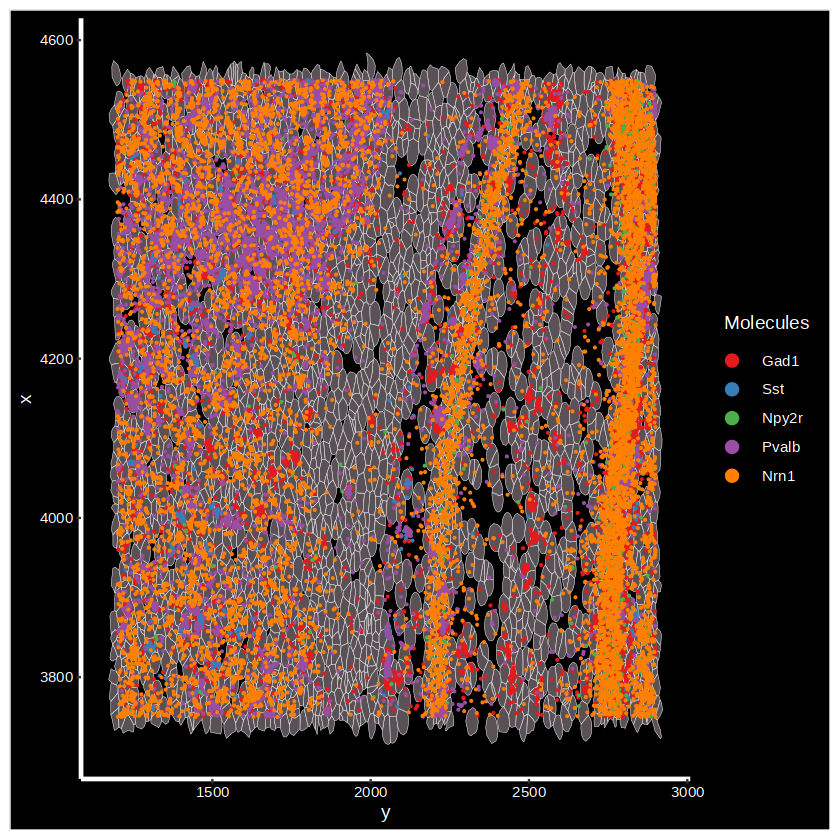

In [17]:
cropped.coords <- Crop(xenium.obj[["fov"]], x = c(1200, 2900), y = c(3750, 4550), coords = "plot")

xenium.obj[["zoom"]] <- cropped.coords

# visualize cropped area with cell segmentations & selected molecules
DefaultBoundary(xenium.obj[["zoom"]]) <- "segmentation"
ImageDimPlot(xenium.obj, fov = "zoom", axes = TRUE, border.color = "white", border.size = 0.1, cols = "polychrome",
    coord.fixed = FALSE, molecules = c("Gad1", "Sst", "Npy2r", "Pvalb", "Nrn1"), nmols = 10000)


In [4]:
cell_info <- as.data.frame(data.table::fread(file.path(data.dir, "cells.csv.gz")))
cell_info %>% head

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1,1898.815,2540.963,384,0,0,385,305.2111,70.714687
2,2,1895.305,2532.627,146,0,0,146,176.6061,6.412187
3,3,2368.073,2534.409,81,0,0,81,263.9383,32.783437
4,4,1903.726,2560.010,314,0,0,315,427.8103,68.185938
5,5,1917.481,2543.132,639,0,0,640,424.6042,102.956250
6,6,1926.540,2560.044,270,0,0,270,416.8825,33.415625


In [5]:
cell_info %>% colnames

[1] "cell_id"                 "x_centroid"             
[3] "y_centroid"              "transcript_counts"      
[5] "control_probe_counts"    "control_codeword_counts"
[7] "total_counts"            "cell_area"              
[9] "nucleus_area"

In [6]:
cell_boundaries_df <- as.data.frame(data.table::fread(file.path(data.dir, "cell_boundaries.csv.gz")))
cell_boundaries_df %>% head

,cell_id,vertex_x,vertex_y
,<int>,<dbl>,<dbl>
1,1,1901.875,2526.413
2,1,1901.450,2537.038
3,1,1900.175,2539.375
4,1,1896.562,2539.800
5,1,1885.938,2537.887
6,1,1882.963,2542.775


In [6]:
tx_dt <- as.data.frame(data.table::fread(file.path(data.dir, "transcripts.csv.gz")))
          transcripts <- subset(tx_dt, qv >= 20)
tx_dt %>% head
tx_dt %>% colnames %>% dput

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv
,<int64>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,281474976710658,7703,0,Dkk3,4820.326,768.6793,15.69359,16.51563
2,281474976710659,7704,0,Dkk3,4820.890,731.1185,15.17346,22.90103
3,281474976710661,7704,0,Dkk3,4821.784,733.2124,14.51788,15.17810
4,281474976710664,7886,0,Bhlhe40,4824.488,656.7761,15.05208,22.88614
5,281474976710665,7704,1,Bhlhe40,4825.741,737.8718,17.31218,31.84678
6,281474976710666,7706,1,Neurod6,4825.865,731.9268,15.60598,15.87004


c("transcript_id", "cell_id", "overlaps_nucleus", "feature_name", 
"x_location", "y_location", "z_location", "qv")


In [7]:
tx_dt %>% colnames

[1] "transcript_id"    "cell_id"          "overlaps_nucleus" "feature_name"    
[5] "x_location"       "y_location"       "z_location"       "qv"

In [8]:
matrix = Read10X(data.dir = file.path(data.dir, 'cell_feature_matrix/'))

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [ ]:
assay = CreateAssayObject(counts = matrix[["Gene Expression"]])

In [ ]:
assay@meta.features

In [ ]:
matrix$`Gene Expression`

In [ ]:
Seurat::